In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
desviacion_estandar_esperada =  np.arange(0, 37, 1).std()
desviacion_estandar_esperada

10.677078252031311

In [23]:
varianza_esperada = np.arange(0, 37, 1).var()
varianza_esperada

114.0

In [24]:
esperanza_matematica_esperada = np.arange(0, 37, 1).mean()
esperanza_matematica_esperada

18.0

In [25]:
cantidad_tiradas = 10000
numero_elegido = 11
cantidad_corridas = 10
tiradas = np.random.randint(0, 37, cantidad_tiradas)
tiradas

array([16, 27,  0, ..., 10, 21, 21])

In [26]:
col_to_keys = {
    'desv_est': {
        'title': f'DESVÍO ESTANDAR DEL NUMERO {numero_elegido}',
        'ylabel': 'vd (valor del desvio)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'vde (valor del desvio esperado)'
    },
    'var': {
        'title': f'VARIANZA DEL NUMERO {numero_elegido}',
        'ylabel': 'vv (valor de la varianza)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'vve (valor de la varianza esperada)'
    },
    'frec_rel': {
        'title': f'FRECUENCIA RELATIVA DEL NUMERO {numero_elegido}',
        'ylabel': 'fr (frecuencia relativa)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'frn (frecuencia relativa esperada)'
    },
    'frec_rel_%': {
        'title': f'FRECUENCIA RELATIVA (%) DEL NUMERO {numero_elegido}',
        'ylabel': 'fr (frecuencia relativa)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'frn (frecuencia relativa esperada)'
    },
    'esp_mat': {
        'title': f'ESPERANZA MATEMATICA DEL NUMERO {numero_elegido}',
        'ylabel': 'vp (valor promedio de las tiradas)',
        'xlabel': 'n (numero tiradas)',
        'esperado_label': 'vpe (valor promedio esperado)'
    }
}

lineas_horizontales = {
    'desv_est': desviacion_estandar_esperada,
    'var': varianza_esperada,
    'esp_mat': esperanza_matematica_esperada,
    'frec_rel': 1/37,
    'frec_rel_%': (1/37)*100
}

In [27]:
def ejecutar_corrida():
    df = pd.DataFrame()
    df['tiradas'] = np.random.randint(0, 37, cantidad_tiradas)

    frec_abs_acumulada = []
    frec_rel_acumulada = []
    esp_mat_acumulada = []
    desv_est_acumulada = []
    var_acumulada = []

    cantidad_ocurrencias = 0
    for index, tirada in enumerate(df['tiradas']):
        if tirada == numero_elegido:
            cantidad_ocurrencias += 1
        frec_abs_acumulada.append(cantidad_ocurrencias)
        frec_rel_acumulada.append(cantidad_ocurrencias/(index+1))
        esp_mat_acumulada.append(np.mean(df['tiradas'][:index+1]))
        desv_est_acumulada.append(np.std(df['tiradas'][:index+1]))
        var_acumulada.append(np.var(df['tiradas'][:index+1]))

    df['frec_abs'] = frec_abs_acumulada
    df['frec_rel'] = frec_rel_acumulada
    df['frec_rel_%'] = np.array(frec_rel_acumulada) * 100
    df['esp_mat'] = esp_mat_acumulada
    df['desv_est'] = desv_est_acumulada
    df['var'] = var_acumulada
    
    df.index = df.index + 1
    
    return df

In [28]:
def graficar(corridas, es_promedio):
    for col in ['desv_est', 'var', 'esp_mat', 'frec_rel', 'frec_rel_%']:
        plt.figure()
        
        for corrida in corridas:
            sns.lineplot(x=corrida.index, y=corrida[col], alpha=0.6, linewidth=2, label=None)

        if col in lineas_horizontales:
            valor_esperado = lineas_horizontales[col]
            esperado_label = col_to_keys[col]['esperado_label']
            plt.axhline(valor_esperado, color='red', linestyle='--',
                        label=f'{esperado_label} = {valor_esperado:.4f}')            

        title = f'{col_to_keys[col]['title']}{' PROMEDIO' if es_promedio else ''} - {cantidad_corridas} corridas'
        xlabel = col_to_keys[col]['xlabel']
        ylabel = col_to_keys[col]['ylabel']
        
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [29]:
def graficar_histograma(corridas, es_promedio):
    fig, ax = plt.subplots()

    ax.set_xlabel('n')
    ax.set_ylabel('fr (frecuencia relativa)')

    for corrida in corridas:
        ax.bar(corrida['tiradas'], corrida['frec_rel_%'], alpha=0.5)

    ax.axhline((1/37)*100, color='r', linestyle='--', label='fre (frecuencia relativa esperada)')

    ax.legend()

    if es_promedio:
        ax.set_title(f"HISTOGRAMA PROMEDIO {cantidad_corridas} CORRIDAS")
    else:
        ax.set_title(f"HISTOGRAMA {cantidad_corridas} CORRIDAS")

    plt.show()

In [30]:
def calcular_histograma(corridas):
    histogramas = []
    for corrida in corridas:
        df_prom = corrida.groupby('tiradas', as_index=False)[['frec_rel', 'frec_abs']].mean()
        df_prom['frec_rel_%'] = df_prom['frec_rel']*100
        histogramas.append(df_prom)
    return histogramas

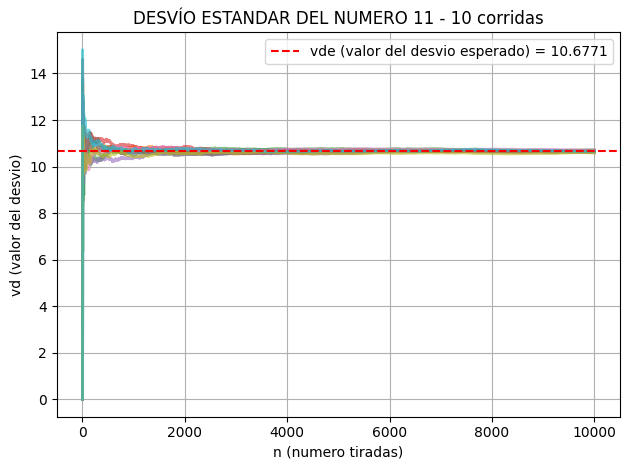

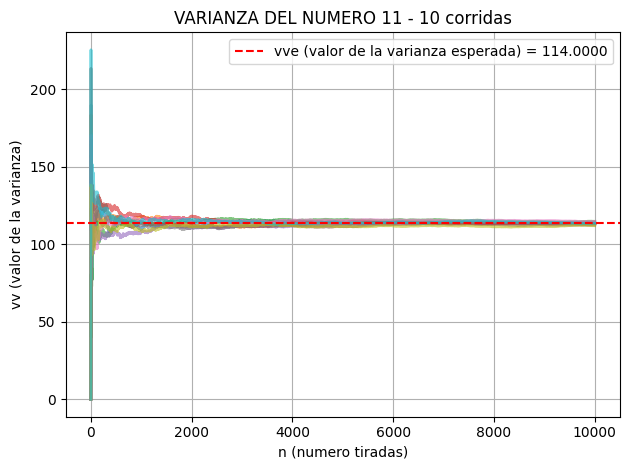

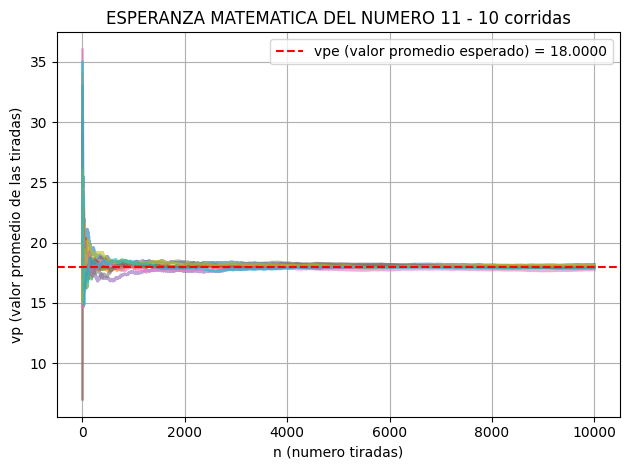

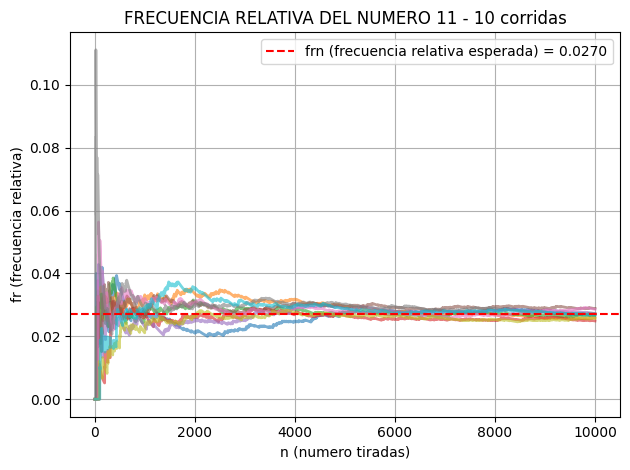

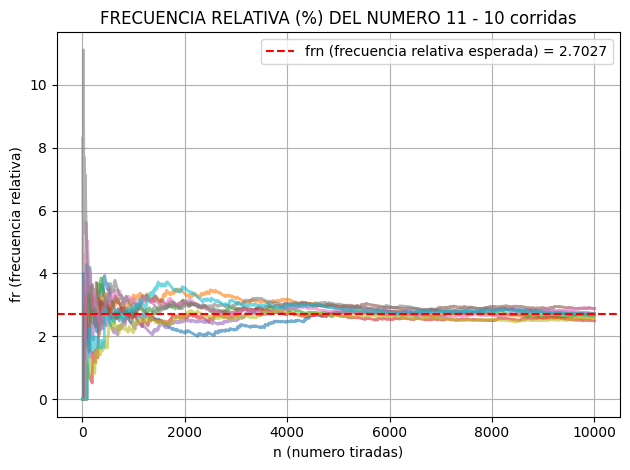

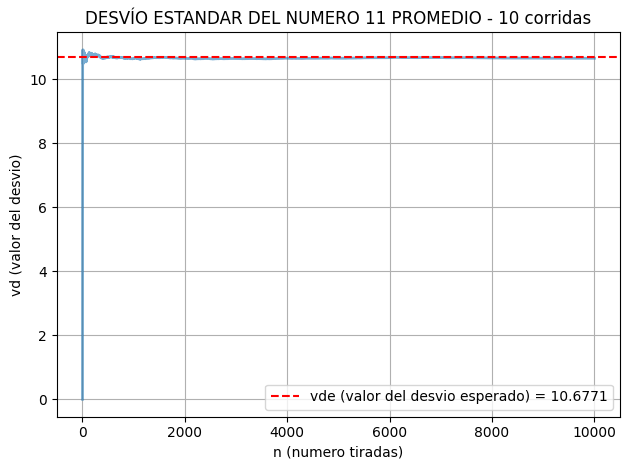

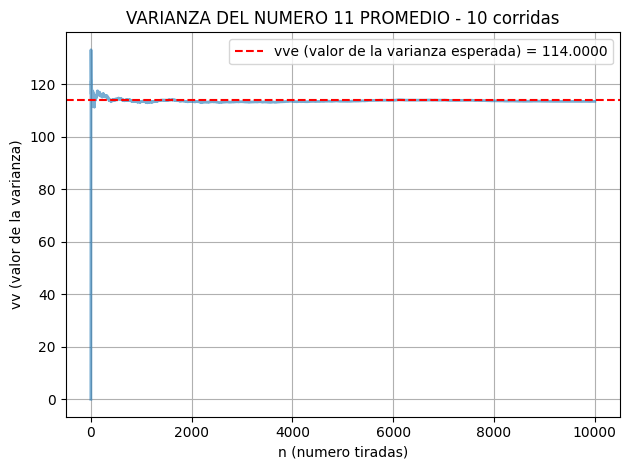

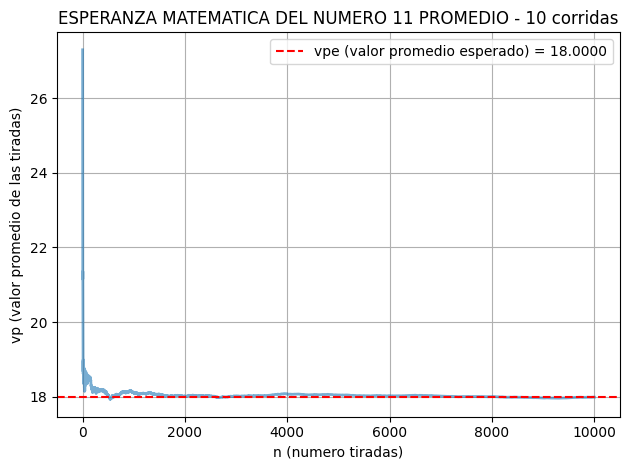

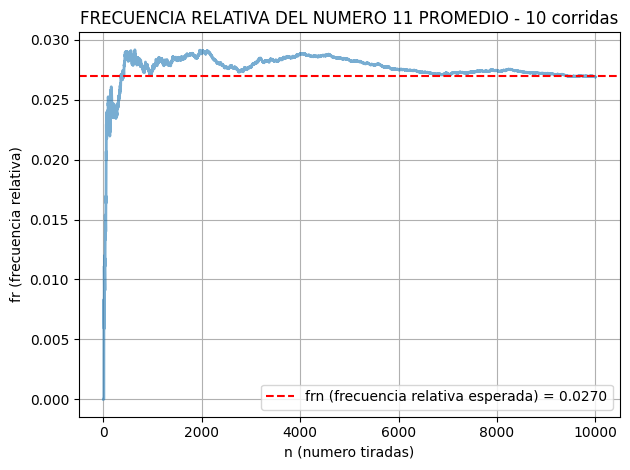

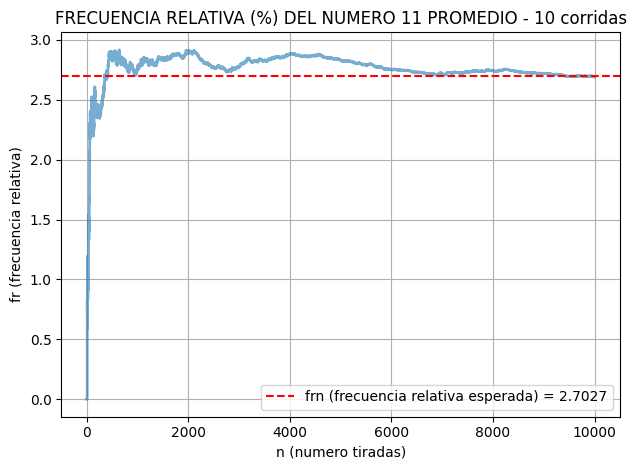

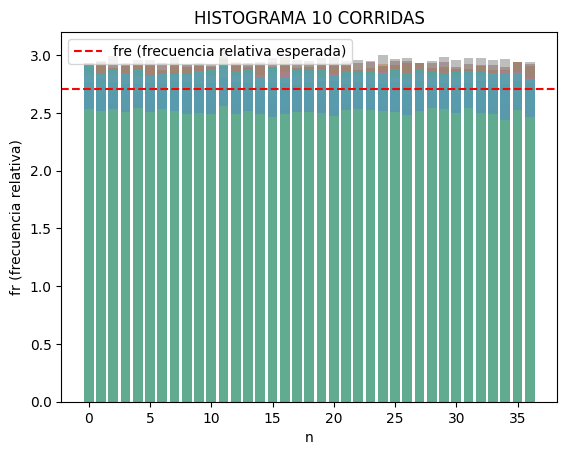

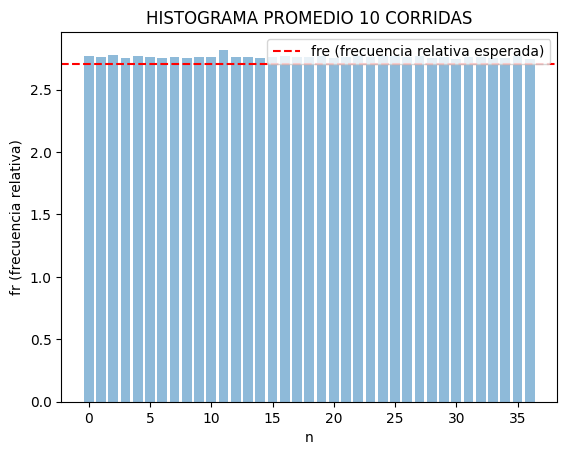

In [31]:
### MAIN ###
corridas = []
for corrida in range(cantidad_corridas):
    corridas.append(ejecutar_corrida())
df_promedio_list = []
df_promedio = pd.concat(corridas).groupby(level=0).mean()
df_promedio_list.append(df_promedio)
graficar(corridas, False)
graficar(df_promedio_list, True)
histogramas = calcular_histograma(corridas)
histograma_promedio_list = []
histograma_promedio = pd.concat(histogramas).groupby(level=0).mean()
histograma_promedio_list.append(histograma_promedio)
graficar_histograma(histogramas, False)
graficar_histograma(histograma_promedio_list, True)

In [32]:
histograma_promedio_list

[    tiradas  frec_rel    frec_abs  frec_rel_%
 0       0.0  0.027686  137.498486    2.768557
 1       1.0  0.027609  134.091400    2.760913
 2       2.0  0.027738  140.129840    2.773794
 3       3.0  0.027556  141.537669    2.755573
 4       4.0  0.027677  139.750949    2.767730
 5       5.0  0.027598  138.474322    2.759798
 6       6.0  0.027532  137.991891    2.753174
 7       7.0  0.027625  139.276797    2.762520
 8       8.0  0.027537  136.813051    2.753721
 9       9.0  0.027570  139.327421    2.756994
 10     10.0  0.027601  138.097120    2.760091
 11     11.0  0.028187  135.050000    2.818688
 12     12.0  0.027626  140.779813    2.762636
 13     13.0  0.027600  137.856717    2.760031
 14     14.0  0.027487  139.013196    2.748685
 15     15.0  0.027631  135.400195    2.763107
 16     16.0  0.027674  137.363511    2.767443
 17     17.0  0.027574  138.180541    2.757428
 18     18.0  0.027598  136.091736    2.759827
 19     19.0  0.027665  136.660705    2.766486
 20     20.0 

In [33]:
histogramas = calcular_histograma(corridas)
histogramas

[    tiradas  frec_rel    frec_abs  frec_rel_%
 0         0  0.026342  134.184932    2.634206
 1         1  0.026408  124.913043    2.640829
 2         2  0.026801  133.208333    2.680125
 3         3  0.026310  131.982833    2.631021
 4         4  0.026427  142.823755    2.642698
 5         5  0.026463  134.152091    2.646295
 6         6  0.026623  132.820896    2.662326
 7         7  0.026838  147.012048    2.683813
 8         8  0.026497  135.387097    2.649686
 9         9  0.026478  128.862205    2.647826
 10       10  0.026715  138.549488    2.671474
 11       11  0.027020  135.500000    2.702041
 12       12  0.026551  140.538182    2.655132
 13       13  0.026421  135.327645    2.642059
 14       14  0.026223  133.670412    2.622343
 15       15  0.026461  135.908451    2.646129
 16       16  0.026486  138.335714    2.648640
 17       17  0.026276  136.949275    2.627569
 18       18  0.026358  136.985240    2.635777
 19       19  0.026336  134.610487    2.633608
 20       20 

In [34]:
df_promedio

,tiradas,frec_abs,frec_rel,frec_rel_%,esp_mat,desv_est,var
1,27.3,0.0,0.000000,0.000000,27.300000,0.000000,0.000000
2,19.7,0.0,0.000000,0.000000,23.500000,7.100000,74.650000
3,20.9,0.0,0.000000,0.000000,22.633333,9.070522,96.977778
4,16.7,0.0,0.000000,0.000000,21.150000,10.896177,133.137500
5,22.2,0.0,0.000000,0.000000,21.360000,10.710180,126.288000
...,...,...,...,...,...,...,...
9996,13.6,268.9,0.026901,2.690076,17.987405,10.652781,113.483322
9997,19.9,269.1,0.026918,2.691808,17.987596,10.652908,113.486025
9998,12.6,269.1,0.026915,2.691538,17.987057,10.653177,113.491777
9999,14.8,269.1,0.026913,2.691269,17.986739,10.653275,113.493861


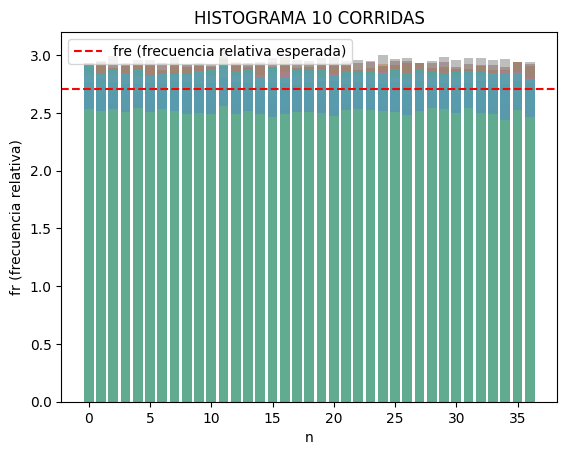

In [35]:
graficar_histograma(histogramas, False)

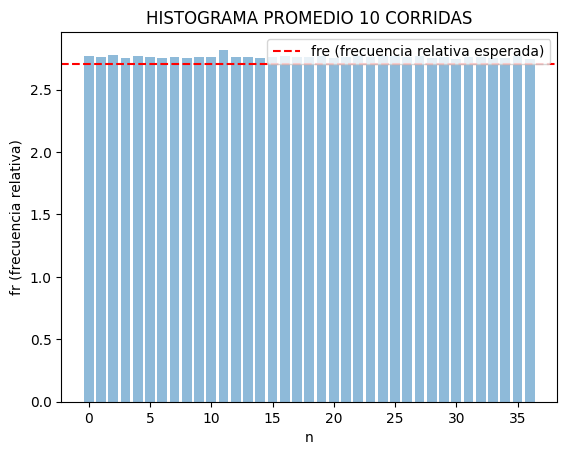

In [36]:
graficar_histograma(histograma_promedio_list, True)

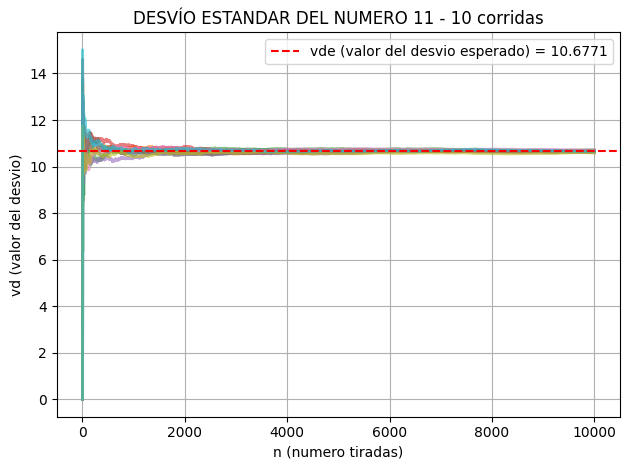

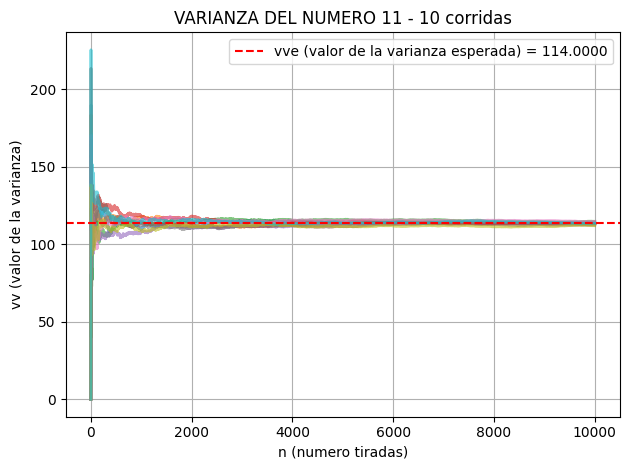

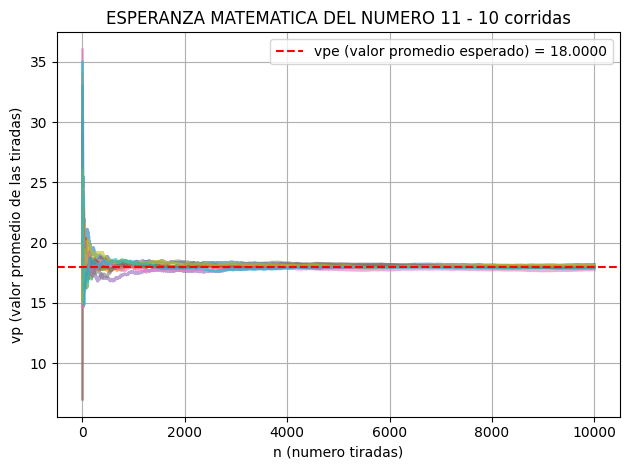

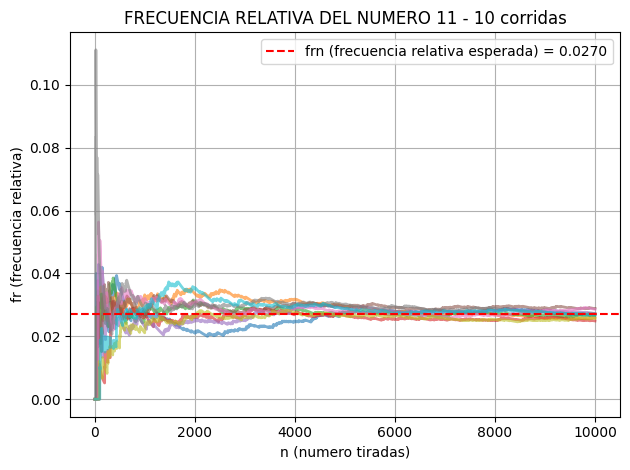

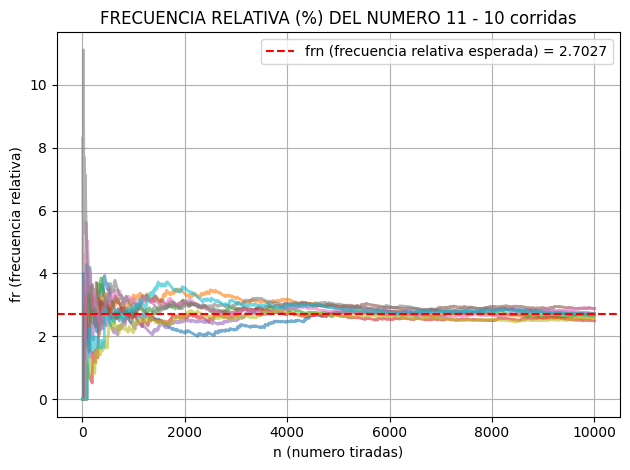

In [37]:
graficar(corridas, False)

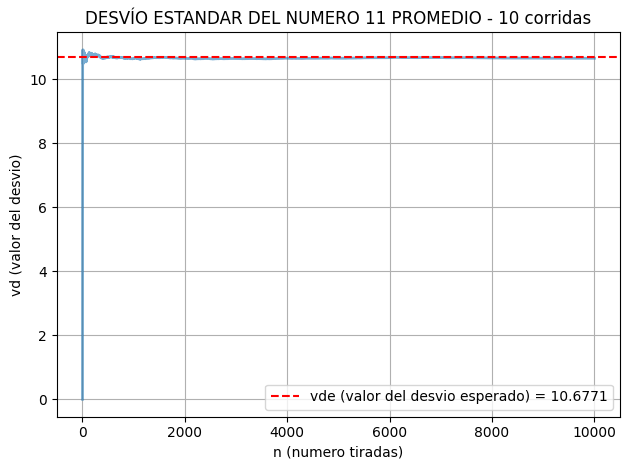

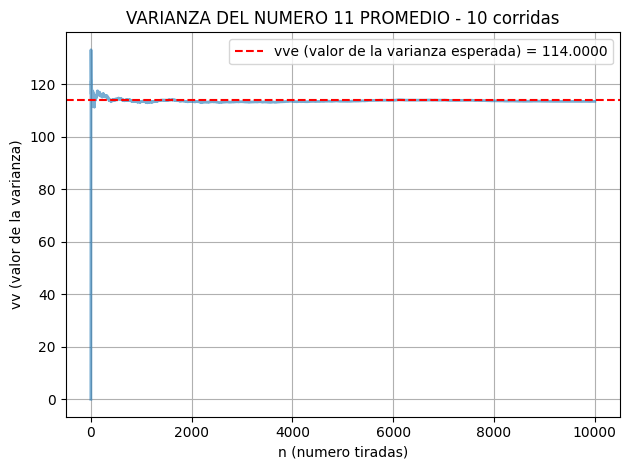

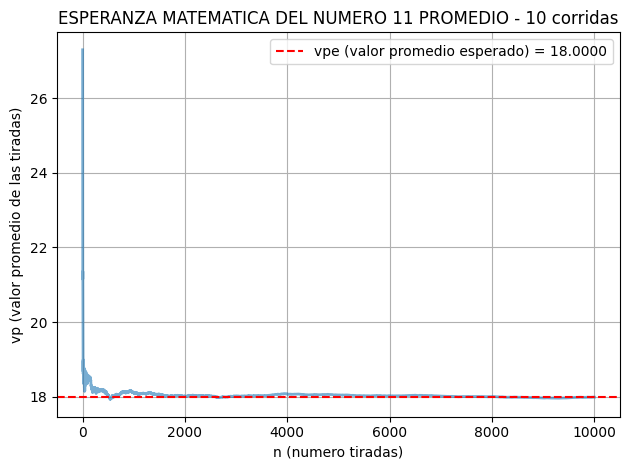

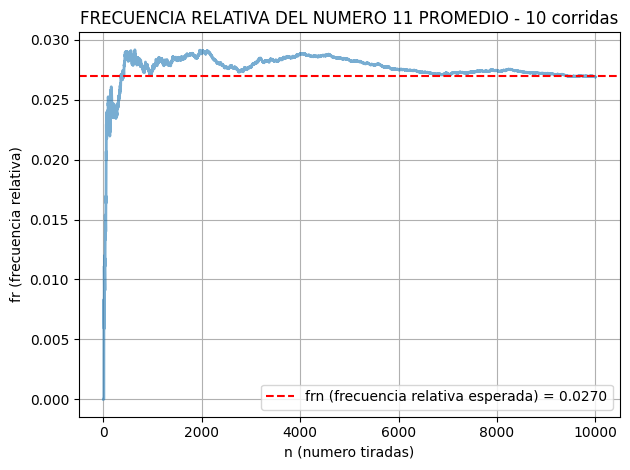

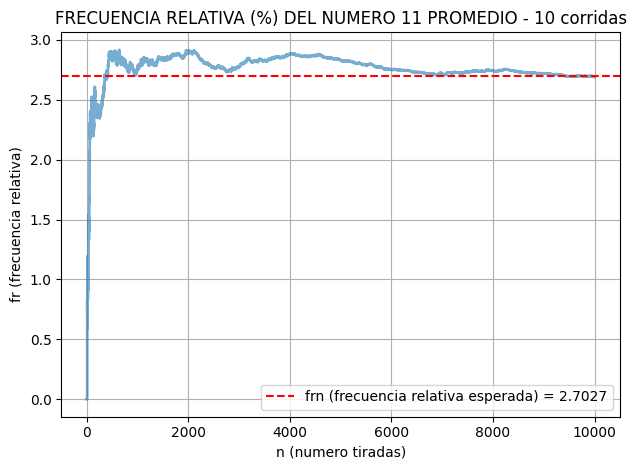

In [38]:
graficar(df_promedio_list, True)

In [39]:
corridas

[       tiradas  frec_abs  frec_rel  frec_rel_%    esp_mat   desv_est  \
 1           29         0  0.000000     0.00000  29.000000   0.000000   
 2           28         0  0.000000     0.00000  28.500000   0.500000   
 3           32         0  0.000000     0.00000  29.666667   1.699673   
 4           28         0  0.000000     0.00000  29.250000   1.639360   
 5           34         0  0.000000     0.00000  30.200000   2.400000   
 ...        ...       ...       ...         ...        ...        ...   
 9996         6       270  0.027011     2.70108  18.192477  10.669400   
 9997        24       270  0.027008     2.70081  18.193058  10.669025   
 9998        13       270  0.027005     2.70054  18.192539  10.668618   
 9999         4       270  0.027003     2.70027  18.191119  10.669028   
 10000       18       270  0.027000     2.70000  18.191100  10.668495   
 
               var  
 1        0.000000  
 2        0.250000  
 3        2.888889  
 4        2.687500  
 5        5.76000

In [40]:
df_promedio_list

[       tiradas  frec_abs  frec_rel  frec_rel_%    esp_mat   desv_est  \
 1         27.3       0.0  0.000000    0.000000  27.300000   0.000000   
 2         19.7       0.0  0.000000    0.000000  23.500000   7.100000   
 3         20.9       0.0  0.000000    0.000000  22.633333   9.070522   
 4         16.7       0.0  0.000000    0.000000  21.150000  10.896177   
 5         22.2       0.0  0.000000    0.000000  21.360000  10.710180   
 ...        ...       ...       ...         ...        ...        ...   
 9996      13.6     268.9  0.026901    2.690076  17.987405  10.652781   
 9997      19.9     269.1  0.026918    2.691808  17.987596  10.652908   
 9998      12.6     269.1  0.026915    2.691538  17.987057  10.653177   
 9999      14.8     269.1  0.026913    2.691269  17.986739  10.653275   
 10000     22.0     269.1  0.026910    2.691000  17.987140  10.653113   
 
               var  
 1        0.000000  
 2       74.650000  
 3       96.977778  
 4      133.137500  
 5      126.28800